In [1]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,99,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,32,68,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,32,78,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,28,24,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,23,136,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
35512,19,57,2002,3,225000.0,1800.0,3,0,4400.0,20,11250.000000
35513,6,84,2015,11,89000.0,1500.0,0,0,7000.0,7,12714.285714
35514,23,51,2016,10,50000.0,1950.0,0,1,29500.0,6,8333.333333
35515,22,10,2006,1,370000.0,2000.0,0,0,4000.0,16,23125.000000


we will run linear regression only on the numeric columns. We will have 4 of them.
Let's introduce the model of the target variable as


$$ \begin{align*}
   &y_i = \sum_{j=1}^{4}x_{ij}w_j +\epsilon_i \\
   \text{or }& y_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3 + x_{i4}\cdot w_4 + \epsilon_i \\
   \text{or }& y_i = X_i W^T + \epsilon_i ,
   \end{align*}
   $$
where
<ul>
    <li> $y_i$ - target prediction for $i$ record in the dataset;</li>
    <li> $X_i  = \{x_{ij}\}_{j=1}^{4}$ - a set of input parameters for $i$ result;</li>
    <li> $W = \{w_{j}\}_{j=1}^{4}$ - set of weight parameters that we have to pick up in the model;</li>
    <li> $\epsilon_i$ - some set of random (not explained by our model, residual) values, we will consider them as random noise.  
</ul>   
    <br> then our regression model will have the following form
         \begin{align*}
   &\hat{y}_i = \sum_{j=1}^{4}x_{ij}w_j  \\
   \text{else }& \hat{y}_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3  + x_{i4}\cdot w_4 \\
   \text{else }& \hat{y}_i = X_i W^T,
   \end{align*}
   
where <ul>
    <li> $\hat{y}_i $ -prediction result for $i$ record in the dataset.   </ul>   
        
firs of all we will split date

In [3]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [4]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  35517 non-null  int64  
 1   Distance              35517 non-null  float64
 2   Engine_capacity(cm3)  35517 non-null  float64
 3   Price(euro)           35517 non-null  float64
 4   km_year               35517 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.4 MB


,0,1,2,3
24856,0.90,0.189919,0.166667,0.632599
24857,0.42,0.283928,0.375000,0.187709
24858,0.68,0.229923,0.270833,0.269126
24859,0.70,0.204475,0.479167,0.254202
24860,0.82,0.132761,0.416667,0.264224


# Let's introduce the regression consumer function as the square of the difference between the target values and their predictions
$$ L(\hat{y}_i,y_i)=L_i= (\hat{y}_i-y_i)^2 = \left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)^2 = \left(X_i W^T-y_i\right)^2 , $$
где  $L_i$ - loss function for the result (prediction) with number
 $i$. <br>
 Also, let's introduce the function of calculation (prediction) of predict values.

In [5]:
def forward(weights, inputs):
    return inputs.dot(weights.T)

def loss_func(predicts, labels):
        return np.square(predicts - labels)

In [6]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[ 0.09176786 -0.56533098 -0.13116156  0.84043883]
0.2641796013528741 7750.0 7749.735820398647


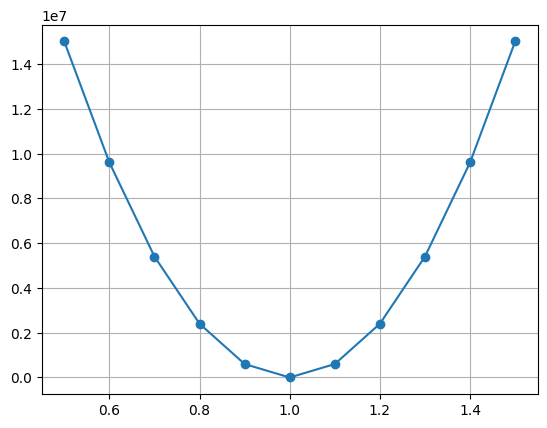

In [7]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 11)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o'); plt.grid();

Let us note at once that we need not only the loss function itself, but also its derivative on the set of optimized parameters $\{w_j\}$.   
$$\frac{\partial L_i}{\partial w_j} = 2\left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)x_{ij} = 2(\hat{y}_i - y_i)x_{ij},$$
where  $\frac{\partial L_i}{\partial w_j}$ - partial derivative of function $L_i$ on the parameter $w_j$  <br>   
then on the set of all variables we obtain the derivative of the form:
$$\nabla_{W}L_i  = 2(\hat{y}_i-y_i)\odot X_i,  $$
 где <ul>gradient, i.e. the set of partial derivatives of function $L_i$ on the set of\{$w_j$\}.  
    <li> $\odot$ - element-by-element multiplication operation (Adamar multiplication)

In [8]:
def grad_loss(predicts, labels, inputs):
    return 2*(predicts - labels)*inputs/inputs.size

In essence, this method boils down to sequential (iterative) recalculation of weight parameter values inverse to the values of the error gradient (i.e., in the direction opposite to the direction of error growth).
<br> denote the iteration number as $t$, then the expression for updating the weight parameters can be written as:

$$ W^t = W^{t-1}-\eta\nabla_{W}L(\hat{y}_i,y_i)=W^{t-1} - 2\eta (\hat{y}_i-y_i)\odot X_i^T  $$

where <ul>
<li> $\eta$ - The coefficient with which the values of weight parameters change is the so-called learning rate.

In [9]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[ 1.63284202 -1.07594149  0.55840293 -0.32695494]
[-7.79108987e+06 -7.55476143e+08 -6.97362594e+06 -6.86796494e+07]


In [10]:
def update_weights(grad, weights, lerning_rate):
    return weights - lerning_rate*grad

In [11]:
lerning_rate = 0.01
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[  77912.53150596 7554760.35591741   69736.81777394  686796.16685041]


In addition to training the values of weight parameters, it is necessary to set their initial values - that is, to carry out the initialization procedure. Such a procedure can be carried out using small random values. We will choose the spread of these values as $\sqrt{weight.size}$

In [12]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)

    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [13]:
weights = weights_init(X_train.shape[1], random_state=42)
weights

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493])

Let's also create a training procedure. The procedure will repeat the process of weight update using gradient descent a specified number of times (epochs).

The function will require the following inputs:

$X$ - the set of input values (batch) in the format: "number of records" x "values per record";

$y$ - the set of target variables (labels);

$weights$ - the initial values of weight parameters;

$lr$ - the learning rate ($\eta$);

$epochs$ - the number of training epochs.

The function will provide the following outputs:

$weights$ - the set of trained weight parameters;

$cost$ - the cost function graph.

It's worth noting that in practice, we can update weight parameters not for each individual value $i$, but for a whole set of such values. In this case, a more accurate expression would be:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i),  $$
где $n$ - sample size.  

In [14]:
def fit(X, y, weights, lr,  epochs=30):

    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        for m in range(X.shape[0]):
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)
        cost[i] = loss/X.shape[0]

    return weights, cost

In [15]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' );
    plt.grid()
    plt.xlabel("epoch",fontsize=35)
    plt.ylabel("loss_function",fontsize=35)
   # plt.xticks(FontSize = 25)

    #plt.yticks(FontSize = 25);

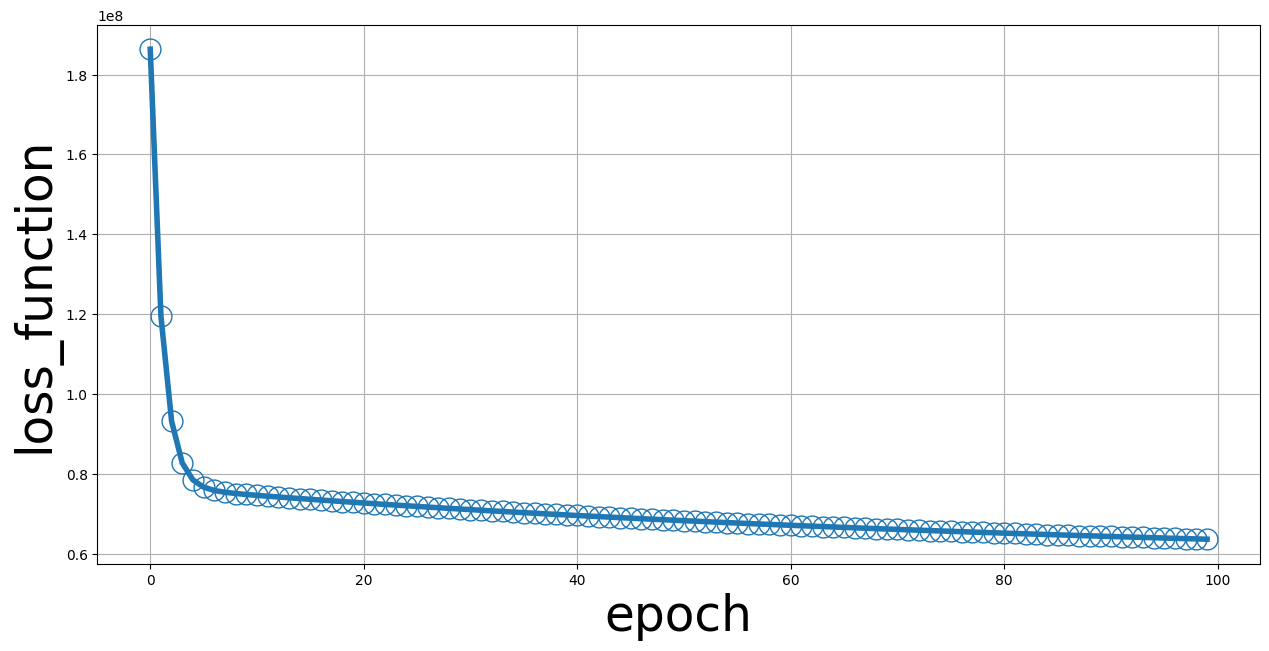

In [16]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

Now let's check how accurately our function predicts, for this we can use the $R^2$ metric, the metric corresponds to the relative RMS error, it can be calculated as:
$$
R^2 = 1-\frac{\sum_{i=0}^{n-1}(y_i - \hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i - \mathrm{ev}(y))^2} = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}},
$$

In [17]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])

    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)

    return yhat

In [18]:
def r2_score(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels-predicts))/np.sum(np.square(labels-np.mean(labels)))

let's see how our answers compare to the real ones

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


([], [])

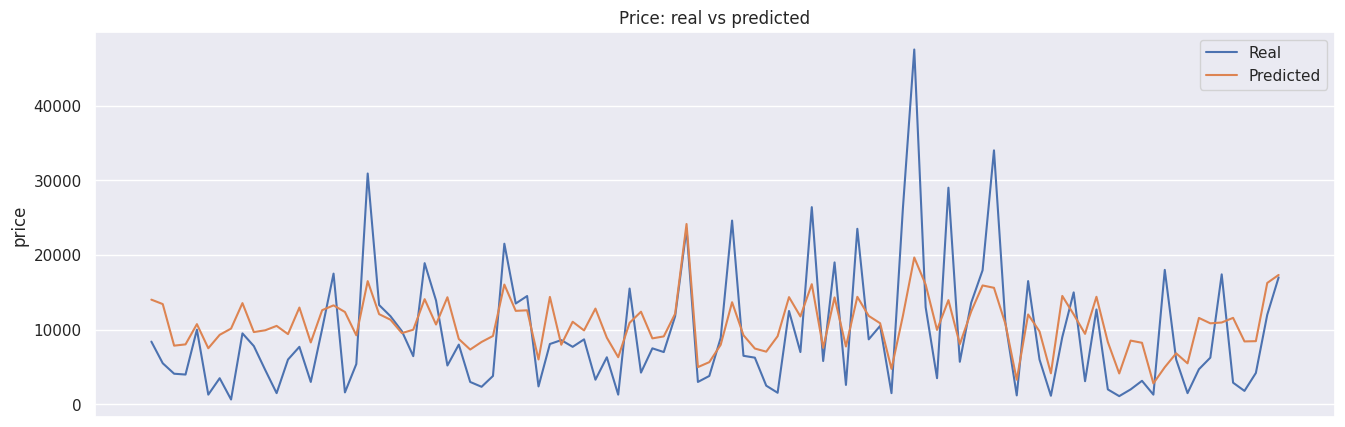

In [30]:

predicted =predict(weights, X_test)

A = np.array(y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())


In [31]:
print('Variance score: %.2f' % r2_score(weights, X_test, y_test))


Variance score: 0.38


In [21]:
BATCH = 5000

def fit_SGD(X, y, weights, lr,  epochs=30, batch_size = BATCH, random_state = 42):

    np.random.seed(random_state)


    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)


        for m in range(batch_size):
            yhat  = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat,  y_batch[m], x_batch[m,:])
            loss += loss_func(yhat,  y_batch[m])

        weights  = update_weights(grad/batch_size,weights, lr)
        cost[i] =loss/batch_size

    return weights, cost

0.3766508999207737


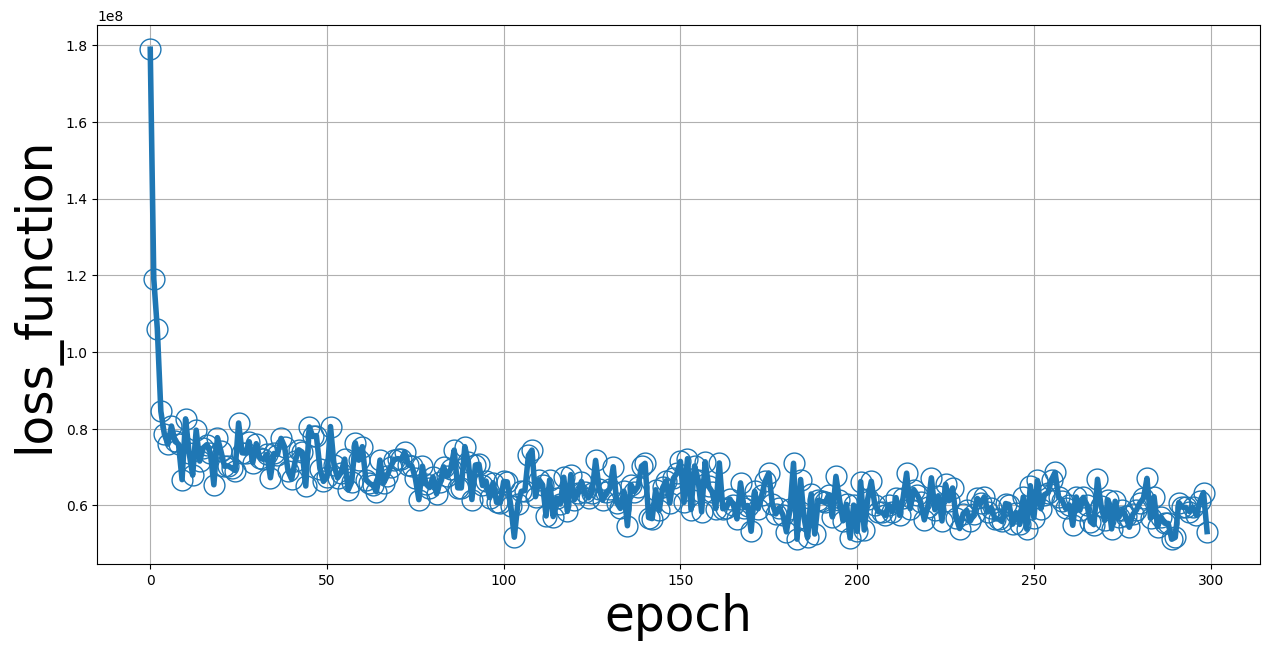

In [22]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit_SGD(X_train, y_train, weights, lr=0.7,  epochs=300)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost)

print(r2_score(weights, X_test, y_test))

Now let's merge all our part into one linear regression class.
When combining, we will make two additional modifications to our model.

First, we introduce an additional term in the model - bias (b), then we can write the model as follows

\begin{align*}
        &\hat{y}_i = \sum_{j=1}^{p}x_{ij}w_j+b \\
        \text{   or: }&\hat{y}_i = \sum_{j=0}^{p}x_{ij}w_j, x_{i0} \equiv 1.
        \end{align*}

Both expressions are formally equivalent. <ul>
Additionally, it should be noted that the gradient of the loss function with respect to the residual term can be expressed as follows:
$$b^t = b^{t-1}-\eta\nabla_{b}L(\hat{y}_i,y_i)=b^{t-1} - 2\eta(\hat{y}_i-y_i)$$
        </ul>
We will use the second approach, which means we will combine weights and biases, and add a column of ones to the data.

<li> Secondly, we will perform vectorization where unnecessary loops were used.
    <br> It should be noted that the expression for calculating the total gradient can be vectorized as follows:
$$2\sum_{i=0}^{n-1}(\hat{y}_i-y_i)\odot X_i^T = 2 X^T(\hat{y}-y), $$                

In [23]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # if weights and offsets are set
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #combine into one array, if we haven't done so
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #merge into one array, if we have not done so
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('epoch', fontsize = 24)
        plt.ylabel('loss', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

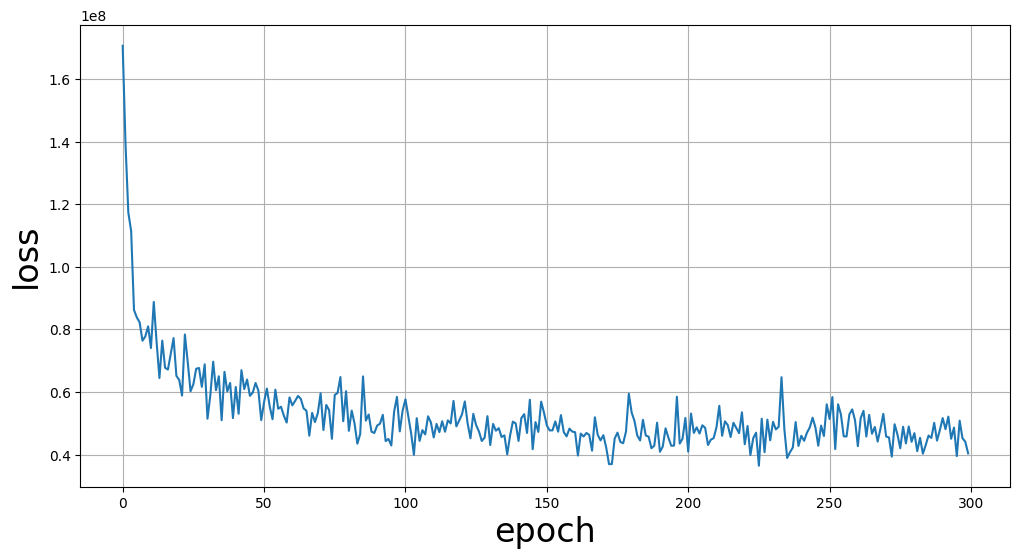

In [24]:
regr = LinearRegression(learning_rate=0.5,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

In [25]:
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

train R2: 0.4902; test R2: 0.4903


let's see the weights.

In [26]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

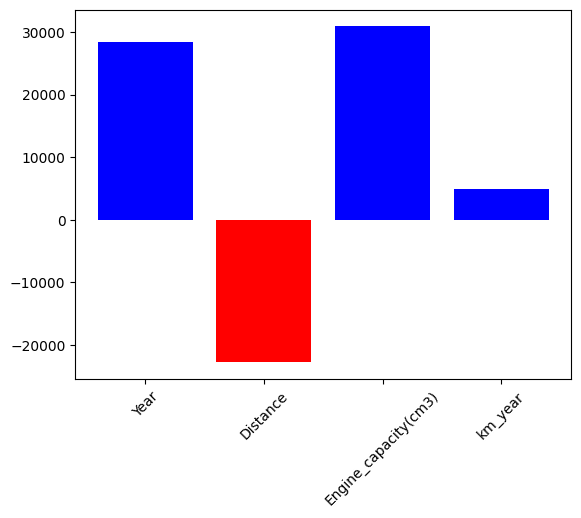

In [27]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)